In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pickle

In [2]:
 def wrangle(path):
        # Read csv file
        df = pd.read_csv(path)
        
        # Changing object cols to numeric cols
        cols = df.columns[df.dtypes.eq('object')]
        df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
        
        
        return df

In [3]:
glob('*year.csv')

['1year.csv', '2year.csv', '3year.csv', '4year.csv', '5year.csv']

In [4]:
files = glob('*year.csv')

In [5]:
df =[wrangle(file) for file in files]

C:\Users\USER\AppData\Local\Temp\ipykernel_12684\1973106935.py:3: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\USER\AppData\Local\Temp\ipykernel_12684\1973106935.py:3: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\USER\AppData\Local\Temp\ipykernel_12684\1973106935.py:3: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [6]:
df = pd.concat(df, ignore_index=True)

In [7]:
df.shape

(42627, 65)

In [8]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42627 entries, 0 to 42626
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   42619 non-null  float64
 1   Attr2   42619 non-null  float64
 2   Attr3   42619 non-null  float64
 3   Attr4   42494 non-null  float64
 4   Attr5   42540 non-null  float64
 5   Attr6   42619 non-null  float64
 6   Attr7   42619 non-null  float64
 7   Attr8   42533 non-null  float64
 8   Attr9   42618 non-null  float64
 9   Attr10  42619 non-null  float64
 10  Attr11  42584 non-null  float64
 11  Attr12  42494 non-null  float64
 12  Attr13  42501 non-null  float64
 13  Attr14  42619 non-null  float64
 14  Attr15  42591 non-null  float64
 15  Attr16  42532 non-null  float64
 16  Attr17  42533 non-null  float64
 17  Attr18  42619 non-null  float64
 18  Attr19  42500 non-null  float64
 19  Attr20  42501 non-null  float64
 20  Attr21  36784 non-null  float64
 21  Attr22  42619 non-null  float64
 22

In [10]:
df['class'].unique()

array([0, 1], dtype=int64)

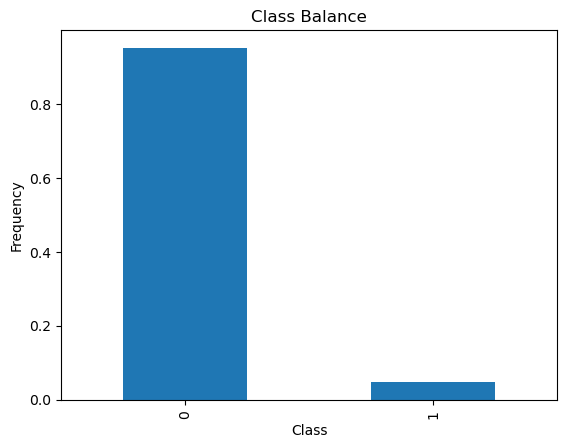

In [11]:
# plotting class balance
df['class'].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel='Class',
    ylabel='Frequency',
    title='Class Balance'
);

creating a boxplot that shows the distributions of the "Attr64" column for both groups in the "class" column.

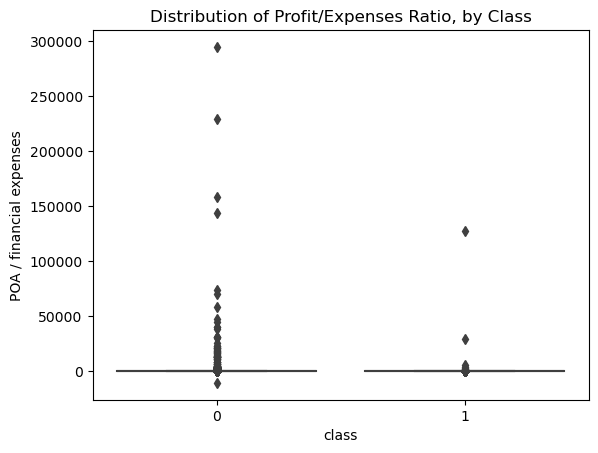

In [12]:
# Create boxplot
sns.boxplot(x='class', y='Attr64', data=df)
plt.xlabel("class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Why does this look so funny? Remember that boxplots exist to help us see the quartiles in a dataset, and this one doesn't really do that. Let's check the distribution of "Attr64"to see if we can figure out what's going on here

Using the describe method on the column for "Attr64". What can you tell about the distribution of the data based on the mean and median?

In [13]:
df['Attr64'].describe().apply('{0:,.0f}'.format)

count     41,829
mean          73
std        2,390
min      -10,677
25%            2
50%            4
75%           10
max      294,770
Name: Attr64, dtype: object

Hmmm. Note that the median is around 5, but the mean is over 200. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

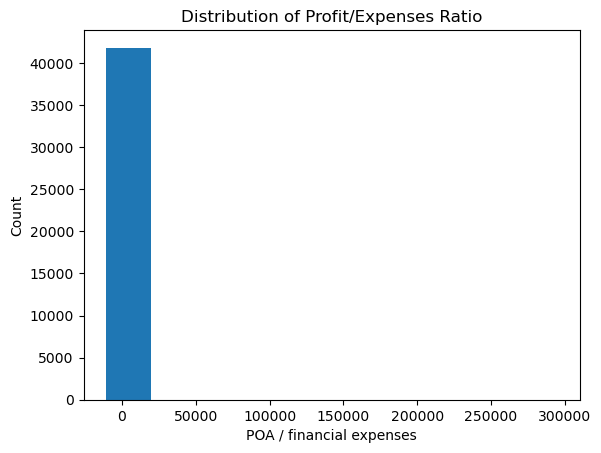

In [14]:
# Plot histogram of `Attr64`
df['Attr64'].plot(kind='hist')
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Aha! We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

Lets Recreate the boxplot that we made above, this time only using the values for "Attr64" that fall between the 0.1 and 0.9 quantiles for the column.

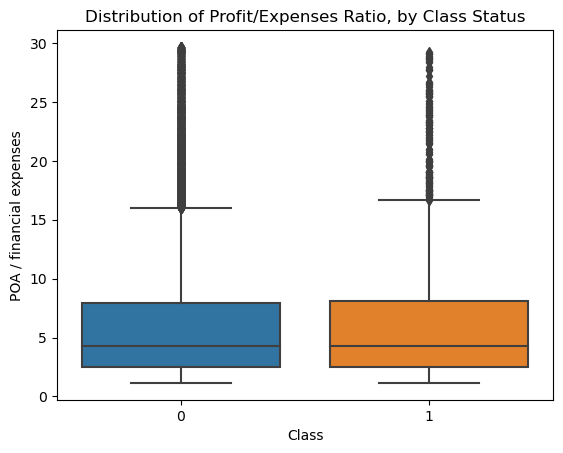

In [15]:
# Create clipped boxplot
q1, q9 = df['Attr64'].quantile([0.1, 0.9])
mask = df['Attr64'].between(q1, q9)
sns.boxplot(x='class', y='Attr64', data=df[mask])
plt.xlabel("Class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class Status");

That makes a lot more sense. Let's take a look at some of the other features in the dataset to see what else is out there.

Profit on operating activities is profit that a company makes through its "normal" operations. For instance, a car company profits from the sale of its cars. However, a company may have other forms of profit, such as financial investments. So a company's total profit may be positive even when its profit on operating activities is negative.

Financial expenses include things like interest due on loans, and does not include "normal" expenses (like the money that a car company spends on raw materials to manufacture cars).

#### Exploring 'Attr31'

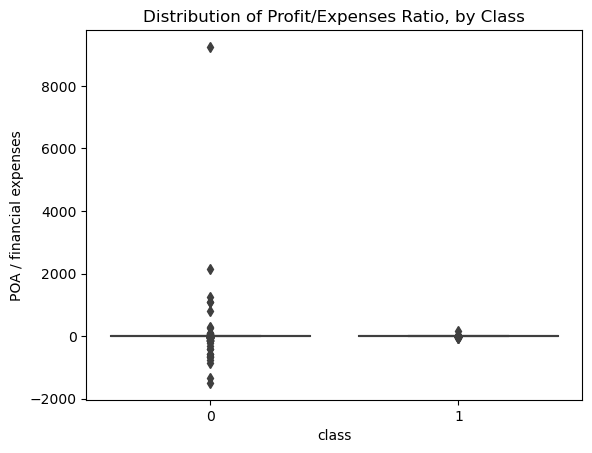

In [16]:
# Create boxplot
sns.boxplot(x='class', y='Attr31', data=df)
plt.xlabel("class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [17]:
df['Attr31'].describe()

count    42501.000000
mean         0.179124
std         49.191974
min      -1495.600000
25%          0.006974
50%          0.043063
75%          0.101730
max       9244.300000
Name: Attr31, dtype: float64

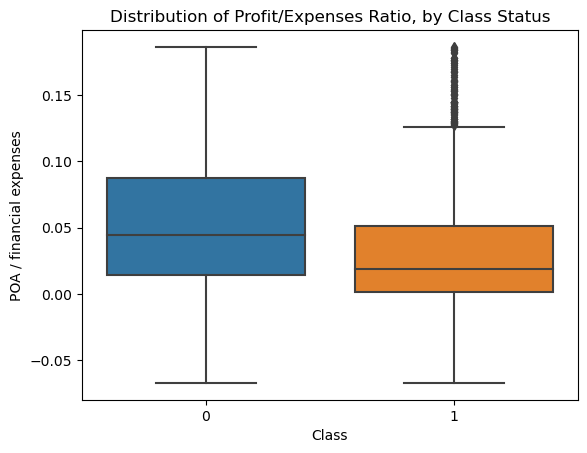

In [18]:
# Create clipped boxplot
q1, q9 = df['Attr31'].quantile([0.1, 0.9])
mask = df['Attr31'].between(q1, q9)
sns.boxplot(x='class', y='Attr31', data=df[mask])
plt.xlabel("Class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class Status");

## Exploring 'Attr4'

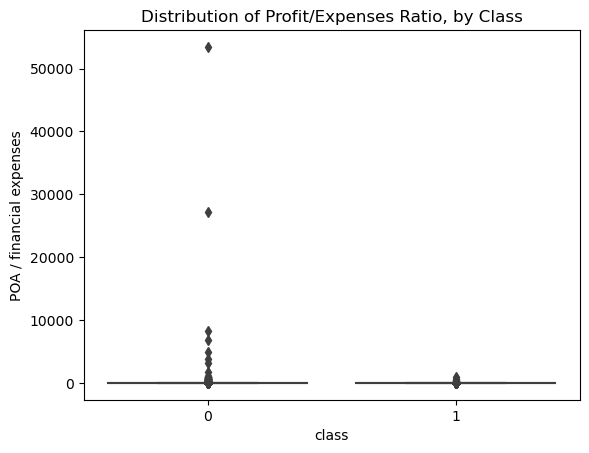

In [19]:
# Create boxplot
sns.boxplot(x='class', y='Attr4', data=df)
plt.xlabel("class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [20]:
df['Attr4'].describe()

count    42494.000000
mean         6.364090
std        298.114451
min         -0.403110
25%          1.048500
50%          1.566550
75%          2.784200
max      53433.000000
Name: Attr4, dtype: float64

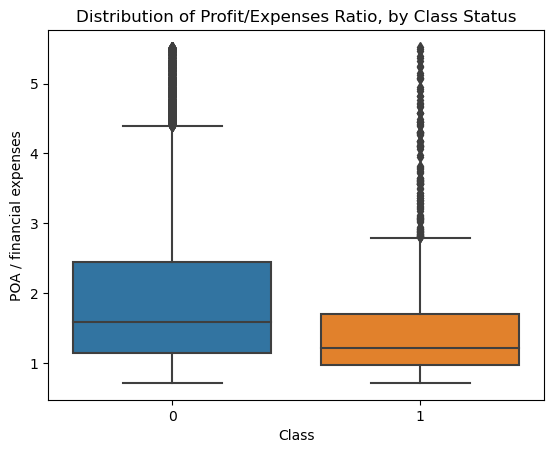

In [21]:
# Create clipped boxplot
q1, q9 = df['Attr4'].quantile([0.1, 0.9])
mask = df['Attr4'].between(q1, q9)
sns.boxplot(x='class', y='Attr4', data=df[mask])
plt.xlabel("Class")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class Status");

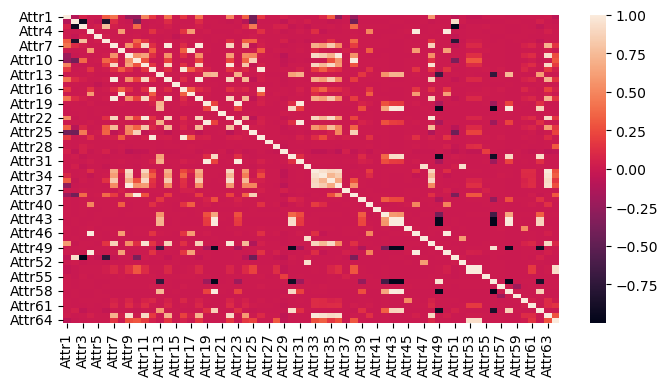

In [22]:
plt.figure(figsize=(8, 4)) 
corr = df.drop(columns='class').corr()
sns.heatmap(corr);

So what did we learn from this EDA? First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

# Machine Learning workflow
## Split

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [33]:
target = 'class'
X = df.drop(columns=[target])
y = df[target]

print(('Shape of X:', X.shape), ('Shape of y:', y.shape))

('Shape of X:', (42627, 64)) ('Shape of y:', (42627,))


Divide your data (X and y) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. And don't forget to set a random_state for reproducibility.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34101, 64)
y_train shape: (34101,)
X_test shape: (8526, 64)
y_test shape: (8526,)


Note that if we wanted to tune any hyperparameters for our model, we'd do another split here, further dividing the training set into training and validation sets. However, we're going to leave hyperparameters for the next lesson, so no need to do the extra split now.

## Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. (This will be different than the resampling we did with time series data in Project 3.) There are many to do this, so let's start with under-sampling.

**Task 5.2.12:** Create a new feature matrix `X_train_under` and target vector `y_train_under` by performing random under-sampling on your training data.

## Undersampling
When data is imbalanced in different classes, one way we can balance it is reducing the number of observations in the majority class. This is called under-sampling. We can under-sample by randomly deleting some observations in the majority class. The open source imbalanced-learn (imported as imblearn) is an open-source library that works with scikit-learn and provides tools when dealing with imbalanced classes. Here's an example of randomly deleting observations from the majority class using Poland bankruptcy data from 2008.

In [38]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(3268, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
10555,0.164570,0.39217,0.607830,2.5499,83.472,0.000000,0.203170,1.54990,2.7557,0.60783,...,928.23,0.065901,0.270750,0.92685,0.0000,NaN,6.7047,51.944,7.0268,NaN
10983,0.072336,0.16131,0.670280,5.3467,142.330,0.000000,0.072336,5.19930,1.2095,0.83869,...,3586.00,0.255760,0.086249,0.76809,0.0000,3.4238,6.0818,46.535,7.8436,6.8914
11389,0.213460,0.36910,0.630900,2.7093,94.410,0.000000,0.263530,1.70930,2.4883,0.63090,...,336.72,0.067517,0.338350,0.90250,0.0000,110.6800,7.8690,54.142,6.7416,NaN
24392,0.065803,0.19843,0.674070,4.4180,814.010,0.000000,0.086775,4.03970,1.2462,0.80157,...,1160.60,0.368370,0.082092,0.67981,0.0000,3.4205,2.9174,57.760,6.3192,9.6819
39862,0.047550,0.87580,0.035726,1.0931,-28.232,0.019354,0.057891,0.14181,1.8499,0.12420,...,1187.40,0.017453,0.382850,0.97029,3.4424,23.8250,11.2600,75.706,4.8213,3.1864


Depending on the random state you set above, you may get a different shape for X_train_under. Don't worry, it's normal!

And then we'll over-sample.

## Over-sampling
Over-sampling is the opposite of under-sampling. Instead of reducing the majority class, over-sampling increases the number of observations in the minority class by randomly making copies of the existing observations. Here is an example of making random copies from the minority class using the Poland bankruptcy data and imblearn.

**Task 5.2.13:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on your training data.

In [39]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(64934, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,-1.062100,0.69728,0.050154,1.07190,-2.7614,0.000000,-1.062100,0.43415,2.3214,0.30272,...,67.404,0.567170,-3.508500,0.43440,0.00000,NaN,3.6018,109.630,3.3293,9.1913
1,-0.138710,0.46865,-0.156390,0.59341,-33.9240,0.000000,-0.138710,1.13380,2.5777,0.53135,...,-3963.200,0.012527,-0.261060,0.99308,0.14725,30.8780,17.8230,54.462,6.7020,3.3401
2,0.019745,0.85147,-0.089812,0.71976,-51.9560,0.019745,0.029294,0.17435,1.0393,0.14846,...,-1789.400,0.037773,0.133000,0.96223,3.57670,276.6100,8.9717,103.320,3.5327,1.4717
3,0.029985,0.73656,0.190350,1.34720,-4985.6000,0.000000,0.042176,0.35767,1.9616,0.26344,...,1347.800,0.027410,0.113820,1.01440,0.71459,4.7429,8.2798,102.020,3.5777,7.5058
4,0.018701,0.52959,-0.109540,0.71714,1040.7000,0.000000,0.025903,0.88825,2.8012,0.47041,...,-1522.900,0.009683,0.039754,0.99485,0.29678,57.0290,12.8680,50.461,7.2333,3.8783


## Build Model
## Baseline

In [40]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9521


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

## Iterate
Now that we have a baseline, let's build a model to see if we can beat it.

### Decision Tree Classifier

Create three identical models: model_reg, model_under and model_over. All of them should use a SimpleImputer followed by a DecisionTreeClassifier. Train model_reg using the unaltered training data. For model_under, use the undersampled data. For model_over, use the oversampled data.

In [43]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy='median'), DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under =  make_pipeline(
    SimpleImputer(strategy='median'), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =  make_pipeline(
    SimpleImputer(strategy='median'), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate
Calculate training and test accuracy for your three models.

In [44]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9536
Training Accuracy: 0.7942
Test Accuracy: 0.7755
Training Accuracy: 1.0
Test Accuracy: 0.957


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

Plot a confusion matrix that shows how your best model performs on your validation set.

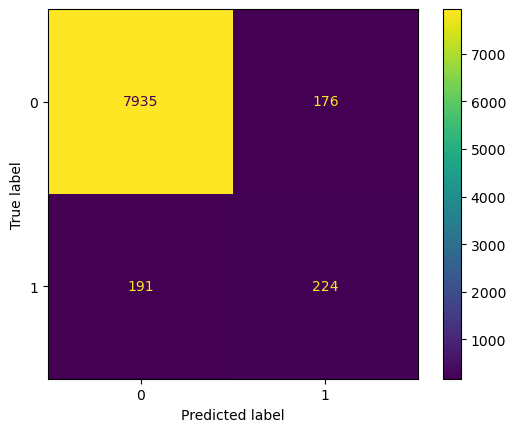

In [45]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

Determine the depth of the decision tree in model_over.

In [46]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

37


## Communicate

Now that we have a reasonable model, let's graph the importance of each feature.

Create a horizontal bar chart with the 15 most important features for model_over. Be sure to label your x-axis "Gini Importance".

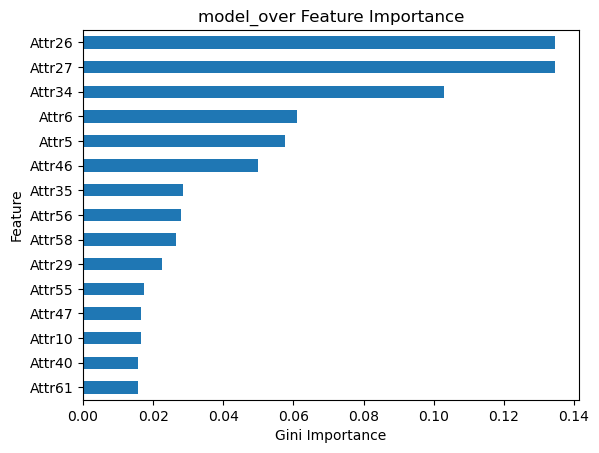

In [47]:
# Get importances
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

There's our old friend "Attr 34" near the top, along with features 27 and 26. It's time to share our findings.

Sometimes communication means sharing a visualization. Other times, it means sharing the actual model you've made so that colleagues can use it on new data or deploy your model into production. First step towards production: saving your model.

In [50]:
# Save your model as `"model-5-2.pkl"`
with open("model-1-2.pkl", 'wb') as f:
    pickle.dump(model_over, f)

In [51]:
# Load `"model-5-2.pkl"`
with open('model-1-2.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf = make_pipeline(
    SimpleImputer(), RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


By default, the number of trees in our forest (n_estimators) is set to 100. That means when we train this classifier, we'll be fitting 100 trees. While it will take longer to train, it will hopefully lead to better performance.

In order to get the best performance from our model, we need to tune its hyperparameter. But how can we do this if we haven't created a validation set? The answer is cross-validation. So, before we look at hyperparameters, let's see how cross-validation works with the classifier we just built.

#### Cross validation
When trying out different hyperparameter settings for estimators (such as the `max_depth` for a random forest), there's a risk in using the test set to evaluate these settings. What happens is that your knowledge about the test set can “leak” into the model, and performance metrics no longer reflect the model's ability to generalize. 

The generalization problem can be solved adding an extra set called **validation set**. In this case, we train the model with the training set, then evaluate different hyperparameters using the validation set. If the model is performing well in both sets, finally we will evaluate the model on the test set.

But there's a drawback to this strategy. The potential issue we may face dividing data into three sets is that we will reduce the number of samples available to fit and train the model. In addition, the model results will change with respect to difference choices of training and validation portions.

The solution here is to use **cross validation** (CV for short). In this case, we will still use a test set, but a validation set is no longer needed. **k-fold CV** is the most used cross validation method(http://scikit-learn.org/stable/modules/cross_validation.html#k-fold). The algorithm divides the training set into $k$ small folds. For each fold $k$, we:

1. Train the model using all the folds but one (i.e. $k-1$ folds) as training data;

1. Validate the model using the remaining fold as if it were test data, and store the performance metric;

This approach makes the best use of all the data we are given, so it's particularly useful when the sample size is small.

Perform cross-validation with your classifier, using the over-sampled training data. We want five folds, so set cv to 5. We also want to speed up training, to set n_jobs to -1.

In [58]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.997305  0.99692   0.997613  0.997228  0.9974588]


That took kind of a long time, but we just trained 500 random forest classifiers (100 jobs x 5 folds). No wonder it takes so long!

Pro tip: even though cross_val_score is useful for getting an idea of how cross-validation works, you'll rarely use it. Instead, most people include a cv argument when they do a hyperparameter search.

Now that we have an idea of how cross-validation works, let's tune our model. The first step is creating a range of hyperparameters that we want to evaluate.

**Task 5.3.8:** Create a dictionary with the range of hyperparameters that we want to evaluate for our classifier.

For the SimpleImputer, try both the "mean" and "median" strategies.
For the RandomForestClassifier, try max_depth settings between 10 and 50, by steps of 10.
Also for the RandomForestClassifier, try n_estimators settings between 25 and 100 by steps of 25.

In [60]:
params = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': range(25, 100, 25),
    'randomforestclassifier__max_depth': range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

Now that we have our hyperparameter grid, let's incorporate it into a grid search.

**Task 5.3.9:** Create a `GridSearchCV` named `model` that includes your classifier and hyperparameter grid. Be sure to use the same arguments for `cv` and `n_jobs` that you used above, and set `verbose` to 1.

In [62]:
model_rf = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model_rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [64]:
# Train model
model_rf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

This will take some time to train, so let's take a moment to think about why. How many forests did we just test? 4 different max_depths times 3 n_estimators times 2 imputation strategies... that makes 24 forests. How many fits did we just do? 24 forests times 5 folds is 120. And remember that each forest is comprised of 25-75 trees, which works out to at least 3,000 trees. So it's computationally expensive!

Okay, now that we've tested all those models, let's take a look at the results.

**Task 5.3.11:** Extract the cross-validation results from `model` and load them into a DataFrame named `cv_results`.

In [66]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.885505,0.273423,0.117088,0.014392,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.944637,0.941634,0.947794,0.948025,0.940936,0.944605,0.002972,21
1,11.456180,0.453887,0.133245,0.034397,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.938323,0.936321,0.941942,0.943020,0.935700,0.939061,0.002944,24
2,22.590225,0.459318,0.212230,0.015804,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.948718,0.945638,0.949334,0.949026,0.942939,0.947131,0.002481,20
3,23.969734,0.322556,0.223004,0.048099,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.941249,0.939863,0.941403,0.943097,0.937856,0.940694,0.001751,23
4,33.726656,1.000425,0.273869,0.020181,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949565,0.946485,0.950489,0.951182,0.944710,0.948486,0.002478,19
5,31.945417,1.265109,0.252725,0.006451,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.942327,0.940094,0.941634,0.945330,0.938857,0.941648,0.002201,22
6,12.524125,0.324582,0.126464,0.006351,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994225,0.992608,0.995149,0.993994,0.993840,0.993963,0.000816,15
7,14.949642,0.354438,0.140625,0.008345,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.992531,0.992454,0.994533,0.993455,0.994148,0.993424,0.000836,18
8,29.742904,0.671070,0.289826,0.043703,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994379,0.993455,0.995765,0.994533,0.994995,0.994625,0.000758,14
9,30.103341,0.626320,0.264095,0.004250,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.993917,0.992531,0.995149,0.993455,0.993994,0.993809,0.000849,17


In addition to the accuracy scores for all the different models we tried during our grid search, we can see how long it took each model to train. Let's take a closer look at how different hyperparameter settings affect training time. 

First, we'll look at `n_estimators`. Our grid search evaluated this hyperparameter for various `max_depth` settings, but let's only look at models where `max_depth` equals 10.

**Task 5.3.12:** Create a mask for `cv_results` for rows where `"param_randomforestclassifier__max_depth"` equals 10. Then plot `"param_randomforestclassifier__n_estimators"` on the x-axis and `"mean_fit_time"` on the y-axis. Don't forget to label your axes and include a title.

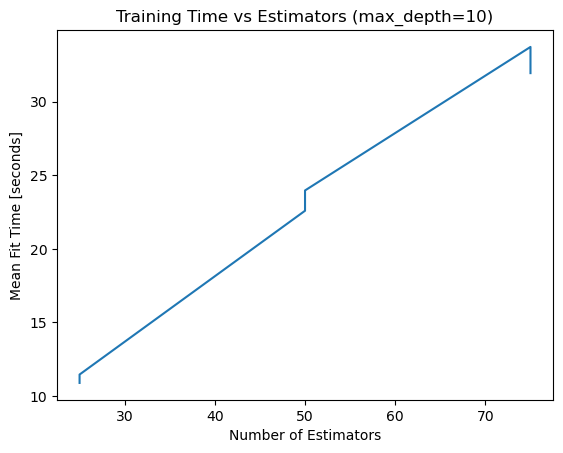

In [67]:
# Create mask
mask = cv_results['param_randomforestclassifier__max_depth'] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]['param_randomforestclassifier__n_estimators'],
    cv_results[mask]['mean_fit_time']
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

**Task 5.3.13:** Create a mask for `cv_results` for rows where `"param_randomforestclassifier__n_estimators"` equals 25. Then plot `"param_randomforestclassifier__max_depth"` on the x-axis and `"mean_fit_time"` on the y-axis. Don't forget to label your axes and include a title. 

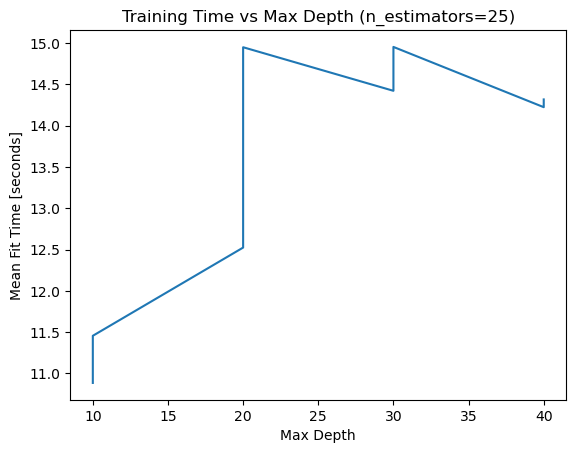

In [68]:
# Create mask
mask = cv_results['param_randomforestclassifier__n_estimators'] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]['param_randomforestclassifier__max_depth'],
    cv_results[mask]['mean_fit_time']
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

There's a general upwards trend, but we see a lot of up-and-down here. That's because for each max depth, grid search tries two different imputation strategies: mean and median. Median is a lot faster to calculate, so that speeds up training time.

Finally, let's look at the hyperparameters that led to the best performance.

In [70]:
# Extract best hyperparameters
model_rf.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

## Evaluate

In [71]:
acc_train = model_rf.score(X_train, y_train)
acc_test = model_rf.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9646


In [72]:
y_test.value_counts()

0    8111
1     415
Name: class, dtype: int64

In [82]:
pd.Series(model_rf.predict(X_test)).value_counts()

0    8359
1     167
dtype: int64

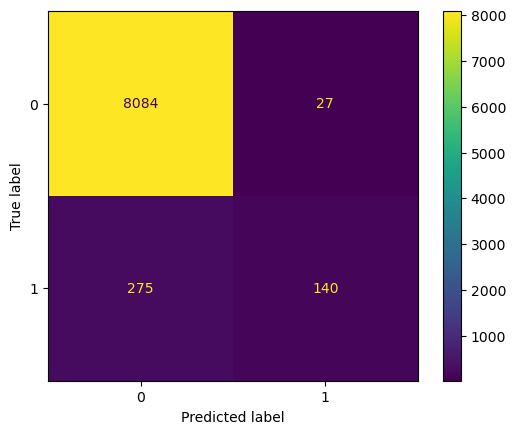

In [74]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test);

## Communicate

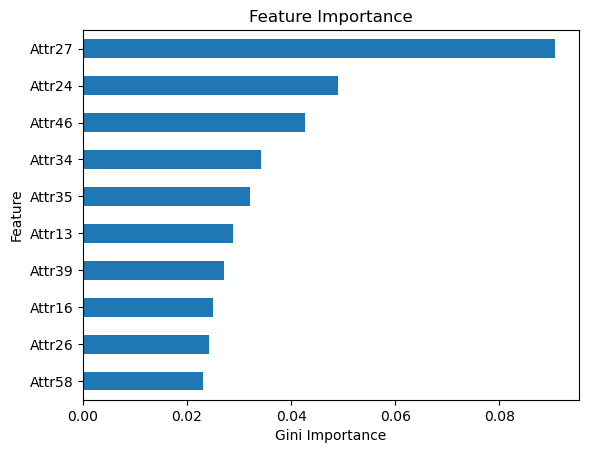

In [76]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model_rf.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [78]:
with open('model-1-3.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

In [79]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name='bankrupt')
    return y_test_pred

In [ ]:
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",
    model_filepath="model-5-3.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

### Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from ipywidgets import widgets, interact
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from teaching_tools.widgets import ConfusionMatrixWidget

## Iterate

In [92]:
clf_gr = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
)
print(clf_gr)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])


Remember while we're doing this that we only want to be looking at the positive class. Here, the positive class is the one where the companies really did go bankrupt. In the dictionary we made last time, the positive class is made up of the companies with the bankrupt: true key-value pair.

Next, we're going to tune some of the hyperparameters for our model.

In [90]:
params_g = {
    'simpleimputer__strategy': ['mean', 'median'],
    'gradientboostingclassifier__n_estimators': range(20, 31, 5),
    'gradientboostingclassifier__max_depth': range(2, 5)
}
params_g

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

Note that we're trying much smaller numbers of n_estimators. This is because GradientBoostingClassifier is slower to train than the RandomForestClassifier. You can try increasing the number of estimators to see if model performance improves, but keep in mind that you could be waiting a long time!

In [94]:
model_gr = GridSearchCV(
    clf_gr, param_grid=params_g,
    cv=5, 
    n_jobs=-1, 
    verbose=1)
model_gr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [95]:
model_gr.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

**Task 5.4.10:** Extract the cross-validation results from `model` and load them into a DataFrame named `cv_results`.

- Get cross-validation results from a hyperparameter search in scikit-learn.

In [98]:
results = pd.DataFrame(model_gr.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,66.821603,6.304434,0.050665,0.018662,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.875953,0.877493,0.875260,0.879418,0.869552,0.875535,0.003315,1
16,67.694869,2.806377,0.057846,0.013126,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.876415,0.873104,0.878340,0.870255,0.867781,0.873179,0.003868,2
15,59.066928,1.871285,0.047075,0.001716,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.869639,0.870332,0.872180,0.870794,0.862082,0.869005,0.003560,3
14,57.631762,3.486530,0.046875,0.009031,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.868330,0.865635,0.872026,0.869254,0.861620,0.867373,0.003528,4
12,47.285414,0.230870,0.057646,0.018469,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.857011,0.860476,0.861246,0.862093,0.854151,0.858995,0.002975,5
13,48.530091,2.310555,0.045878,0.003837,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.859783,0.854162,0.860091,0.859398,0.851917,0.857070,0.003374,6
10,54.535041,1.398771,0.060240,0.024377,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.840533,0.840379,0.844460,0.844768,0.834745,0.840977,0.003630,7
8,39.865849,1.704658,0.041490,0.001620,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.830677,0.833911,0.835066,0.836606,0.823425,0.831937,0.004680,8
11,55.714490,1.490586,0.059441,0.009946,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.831062,0.826981,0.835220,0.833064,0.824195,0.830104,0.004013,9
6,35.530436,0.148611,0.041291,0.002931,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.826827,0.825518,0.825287,0.829599,0.818189,0.825084,0.003773,10


**Task 5.4.11:** Extract the best hyperparameters from `model`.

- [Get settings from a hyperparameter search in scikit-learn.](../%40textbook/14-ml-classification.ipynb#Grid-Search)

In [100]:
# Extract best hyperparameters
model_gr.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

## Evaluate

In [102]:
acc_train = model_gr.score(X_train, y_train)
acc_test = model_gr.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8735
Validation Accuracy: 0.8704


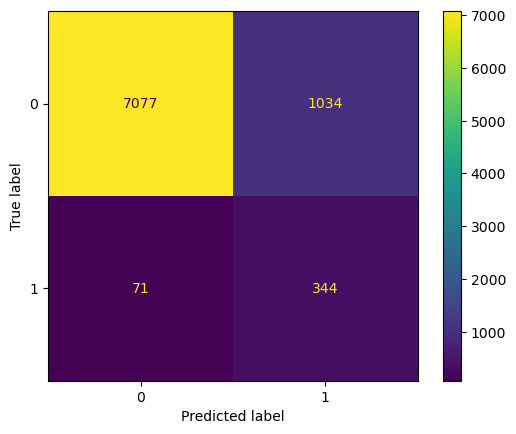

In [109]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_gr, X_test, y_test);

This matrix is a great reminder of how imbalanced our data is, and of why accuracy isn't always the best metric for judging whether or not a model is giving us what we want. After all, if 95% of the companies in our dataset didn't go bankrupt, all the model has to do is always predict `{"bankrupt": False}`, and it'll be right 95% of the time. The accuracy score will be amazing, but it won't tell us what we really need to know.

Instead, we can evaluate our model using two new metrics: **precision** and **recall**.  The precision score is important when we want our model to only predict that a company will go bankrupt if its very confident in its prediction. The *recall* score is important if we want to make sure to identify all the companies that will go bankrupt, even if that means being incorrect sometimes. 

Let's start with a report you can create with scikit-learn to calculate both metrics. Then we'll look at them one-by-one using a visualization tool we've built especially for the Data Science Lab.

In [106]:
# Print classification report
cls = classification_report(y_test, model_gr.predict(X_test))
print(cls)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      8111
           1       0.25      0.83      0.38       415

    accuracy                           0.87      8526
   macro avg       0.62      0.85      0.66      8526
weighted avg       0.95      0.87      0.90      8526



In [115]:
c = ConfusionMatrixWidget(model_gr, X_test, y_test)
c.show()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)

If you move the probability threshold, you can see that there's a tradeoff between precision and recall. That is, as one gets better, the other suffers. As a data scientist, you'll often need to decide whether you want a model with better precision or better recall. What you choose will depend on how to intend to use your model.

Let's look at two examples, one where recall is the priority and one where precision is more important. First, let's say you work for a regulatory agency in the European Union that assists companies and investors navigate [insolvency proceedings](https://en.wikipedia.org/wiki/Insolvency_Regulation). You want to build a model to predict which companies could go bankrupt so that you can send debtors information about filing for legal protection before their company becomes insolvent. The administrative costs of sending information to a company is €500. The legal costs to the European court system if a company doesn't file for protection before bankruptcy is €50,000.

For a model like this, we want to focus on **recall**, because recall is all about *quantity*. A model that prioritizes recall will cast the widest possible net, which is the way to approach this problem. We want to send information to as many potentially-bankrupt companies as possible, because it costs a lot less to send information to a company that might not become insolvent than it does to skip a company that does. 

In [116]:
c.show_eu()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)

For the second example, let's say we work at a private equity firm that purchases distressed businesses, improve them, and then sells them for a profit. You want to build a model to predict which companies will go bankrupt so that you can purchase them ahead of your competitors. If the firm purchases a company that is indeed insolvent, it can make a profit of €100 million or more. But if it purchases a company that isn't insolvent and can't be resold at a profit, the firm will lose €250 million.

For a model like this, we want to focus on precision. If we're trying to maximize our profit, the quality of our predictions is much more important than the quantity of our predictions. It's not a big deal if we don't catch every single insolvent company, but it's definitely a big deal if the companies we catch don't end up becoming insolvent.

This time we're going to build the visualization together.

**Task 5.4.17:** Create an interactive dashboard that shows how company profit and losses change in relationship to your model's probability threshold. Start with the `make_cnf_matrix` function, which should calculate and print profit/losses, and display a confusion matrix. Then create a FloatSlider `thresh_widget` that ranges from 0 to 1. Finally combine your function and slider in the `interact` function.

In [120]:
def make_cnf_matrix(threshold):
    y_pred_proba = model_gr.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f'Profit: €{tp * 100_000_000}')
    print(f'Losses: €{fp * 250_000_000}')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)
thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

## Communicate

In [ ]:
# Save model
with open("model-5-4.pkl", 'wb') as f:
    pickle.dump(model_gr, f)

In [ ]:
%%bash

cat my_predictor.py

In [ ]:
# Import your module
from my_predictor_lesson import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",
    model_filepath="model-5-4.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()